# RNN to Classify Reuters Topics

Train a recurrent neural network to Classify Reuters newswires into 46 Topics.

Dataset of 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [ ]:
%tensorflow_version 1.14
#pip install tensorflow-gpu==2.0.0 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
tf.random.set_random_seed(1)


from __future__ import print_function

import numpy as np
import keras
keras.__version__

!pip install numpy==1.16.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


## Load Reuters Dataset

First let's load the Reuters dataset. Please refer to [this API page](https://keras.io/datasets/#reuters-newswire-topics-classification) for details on how to load the data.

In [ ]:
from keras.datasets import reuters
from keras.models import Sequential
from keras import preprocessing
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 10000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

Loading data...
557056/550378 [==============================] - 0s 1us/step


In [ ]:
#word_index
vocab_size=len(word_index)+1
vocab_size

30980

In [ ]:
# Cut texts after this number of words 
maxlen = 500

from keras.preprocessing import sequence

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
# This turns our lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)


In [ ]:
#Use "one-hot" encoding to vectorize the labels.
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
one_hot_train_labels[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Convert encoded review to words
from tensorflow import keras
INDEX_FROM=3   # word index offset

word_to_id = keras.datasets.reuters.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id['<PAD>'] = 0
word_to_id['<START>'] = 1
word_to_id['<UNK>'] = 2

id_to_word = {value:key for key,value in word_to_id.items()}

#x_train[0]
print(' '.join(id_to_word[id] for id in x_train[0] ))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

## Fully Connected Neural Networks

Use word embedding layer as well as fully connected layers to classify Reuters newwires.

In [ ]:
# TODO
from keras.models import Sequential
from keras.layers import Flatten, Dense,Embedding
from keras import layers

model_FNN = Sequential()
# Specify the maximum input length to our Embedding layer so we can later flatten the embedded inputs
model_FNN.add(Embedding(10000, 32, input_length=maxlen))
# After the Embedding layer, our activations have shape `(samples, maxlen, 32)`.

# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 32)`
model_FNN.add(Flatten())

# We add the classifier on top
model_FNN.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_FNN.add(layers.Dense(64, activation='relu'))
model_FNN.add(Dense(46, activation='softmax'))
model_FNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_FNN.summary()

#Fit the model
history_FNN = model_FNN.fit(
    x_train, 
    one_hot_train_labels,
    epochs=15,
    batch_size=128,
    validation_split=0.2
)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1024064   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 1,351,214
Trainable params: 1,351,214
Non-trainable params: 0
_________________________________________________________________
Train on 7185 samples, validate on 1797 samples
Epoch 1/15
7185/7185 [==============================] - 0s 55u

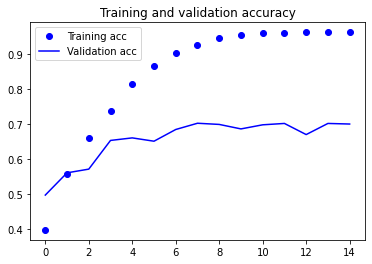

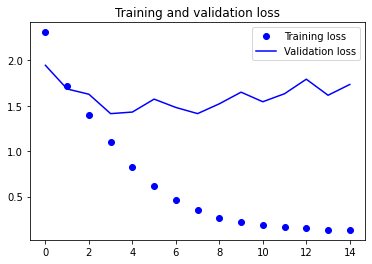

In [ ]:
import matplotlib.pyplot as plt

acc = history_FNN.history['acc']
val_acc = history_FNN.history['val_acc']
loss = history_FNN.history['loss']
val_loss = history_FNN.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# changing epochs to 8 to avoid overfit
from keras.models import Sequential
from keras.layers import Flatten, Dense,Embedding

model_FNN = Sequential()

model_FNN.add(Embedding(10000, 32, input_length=maxlen))
model_FNN.add(Flatten())
model_FNN.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_FNN.add(layers.Dense(64, activation='relu'))
model_FNN.add(Dense(46, activation='softmax'))
model_FNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_FNN.summary()

history_FNN = model_FNN.fit(
    x_train, 
    one_hot_train_labels,
    epochs=8,
    batch_size=128,
    validation_split=0.2
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1024064   
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 1,351,214
Trainable params: 1,351,214
Non-trainable params: 0
_________________________________________________________________
Train on 7185 samples, validate on 1797 samples
Epoch 1/8
7185/7185 [==============================] - 1s 72us

This model has achieved an accuracy of 70.56% on validation data and 92.40% on training data.

In [ ]:
#evaluate model on test set
test_loss, test_acc=model_FNN.evaluate(x_test, one_hot_test_labels)
print('Accuracy:', test_acc)

2246/2246 [==============================] - 0s 63us/step
Accuracy: 0.6865538954734802


Fully neural network is giving an accuracy of about 68.65% on test set.


##RNN/LSTM
Now, we have a fully connected neural networks trained for prediction topics in Reuters data. I will swap out the fully connect layers and replace with a more powerful RNN layers (LSTM, GRU) and experiment with different RNN layers to improve the model performance.

In [ ]:
#changing epochs to 9 as model starts to overfit after that
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras import layers
from keras import regularizers


# build the model
model_RNN = Sequential()
model_RNN.add(Embedding(max_words, 32))
#adding drop out layer
model_RNN.add(layers.Dropout(0.5))
model_RNN.add(SimpleRNN(32, return_sequences=True))
model_RNN.add(SimpleRNN(32, return_sequences=True))
model_RNN.add(SimpleRNN(32, return_sequences=True))
#adding regularizer
model_RNN.add(SimpleRNN(32,kernel_regularizer=regularizers.l2(0.001)))
model_RNN.add(layers.Dropout(0.5))
model_RNN.add(Dense(46, activation='softmax'))

# complie the model
model_RNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_RNN.summary()

# fit the model
history_RNN = model_RNN.fit(
    x_train, 
    one_hot_train_labels,
    epochs=9,
    batch_size=256,
    validation_split=0.2
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

Model has reached a validation accuracy of 50% and 54.6% on train data.

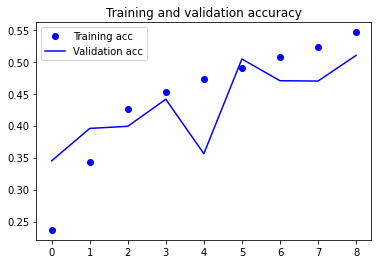

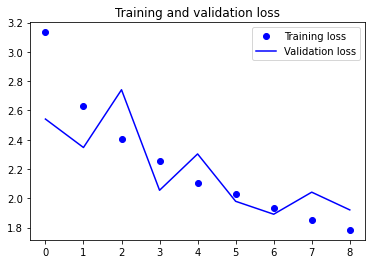

In [ ]:
acc = history_RNN.history['acc']
val_acc = history_RNN.history['val_acc']
loss = history_RNN.history['loss']
val_loss = history_RNN.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#evaluate model on test set
test_loss, test_acc=model_RNN.evaluate(x_test, one_hot_test_labels)
print('Accuracy:', test_acc)

2246/2246 [==============================] - 7s 3ms/step
Accuracy: 0.49777382612228394


Our model has achived an accuracy of ~50% with simple RNN.

In [ ]:
# using LSTM

from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(Embedding(max_words, 32))
model_LSTM.add(layers.Dropout(0.5))
model_LSTM.add(LSTM(32,return_sequences=True))
model_LSTM.add(LSTM(32,return_sequences=True))
model_LSTM.add(LSTM(32,return_sequences=True))
model_LSTM.add(LSTM(32))
model_LSTM.add(layers.Dropout(0.5))
model_LSTM.add(Dense(46, activation='softmax'))

model_LSTM.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_LSTM.summary()
history_LSTM = model_LSTM.fit(
    x_train, 
    one_hot_train_labels,
    epochs=15,

    batch_size=256,
    validation_split=0.2
)



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)               

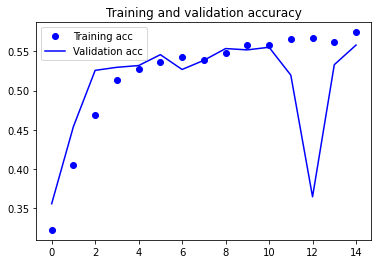

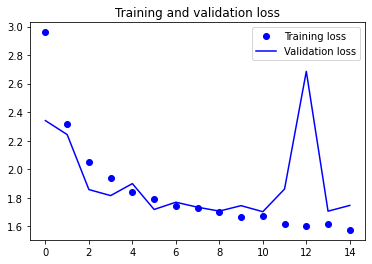

In [ ]:
acc = history_LSTM.history['acc']
val_acc = history_LSTM.history['val_acc']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# final model
# changing epochs to 9 to avoid overfit
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_words, 32))
model_LSTM.add(layers.Dropout(0.5))
model_LSTM.add(LSTM(32,return_sequences=True))
model_LSTM.add(LSTM(32,return_sequences=True))
model_LSTM.add(LSTM(32,return_sequences=True))
model_LSTM.add(LSTM(32))
model_LSTM.add(layers.Dropout(0.5))
model_LSTM.add(Dense(46, activation='softmax'))
model_LSTM.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_LSTM.summary()
history_LSTM = model_LSTM.fit(
    x_train, 
    one_hot_train_labels,
    epochs=9,
batch_size=256,
    validation_split=0.2
)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_15 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)               

LSTM model has achived a accuracy of  54% on validation data.

In [ ]:
#evaluate model on test set
test_loss, test_acc=model_LSTM.evaluate(x_test, one_hot_test_labels)
print('Accuracy:', test_acc)

2246/2246 [==============================] - 15s 7ms/step
Accuracy: 0.551202118396759


This model has achieved a 55% accuracy on test data. That is a 5% improvement over simple RNN.

In [ ]:
# using GRU

from keras.layers import GRU
model_GRU = Sequential()
model_GRU.add(Embedding(max_words, 32))
model_GRU.add(layers.Dropout(0.5))
model_GRU.add(GRU(32,return_sequences=True))
model_GRU.add(GRU(32,return_sequences=True))
model_GRU.add(GRU(32,return_sequences=True))
model_GRU.add(GRU(32))
model_GRU.add(layers.Dropout(0.5))
model_GRU.add(Dense(46, activation='softmax'))



model_GRU.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_GRU.summary()
history_GRU = model_GRU.fit(
    x_train, 
    one_hot_train_labels,
    epochs=10,
    batch_size=256,
     validation_split=0.2
)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_2 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_3 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)               

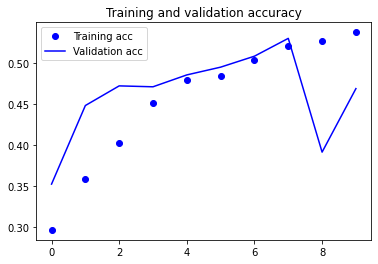

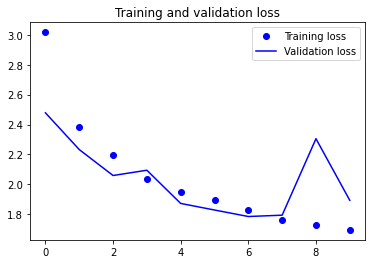

In [ ]:
acc = history_GRU.history['acc']
val_acc = history_GRU.history['val_acc']
loss = history_GRU.history['loss']
val_loss = history_GRU.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Model starts to overfit after 8 epochs so chanhing epochs to 8 to avoid overfit
# Final model using GRU

from keras.layers import GRU
model_GRU = Sequential()
model_GRU.add(Embedding(max_words, 32))
model_GRU.add(layers.Dropout(0.5))
model_GRU.add(GRU(32,return_sequences=True))
model_GRU.add(GRU(32,return_sequences=True))
model_GRU.add(GRU(32,return_sequences=True))
model_GRU.add(GRU(32))
model_GRU.add(layers.Dropout(0.5))
model_GRU.add(Dense(46, activation='softmax'))


#epochs =8
model_GRU.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_GRU.summary()
history_GRU = model_GRU.fit(
    x_train, 
    one_hot_train_labels,
    epochs=8,
    batch_size=256,
     validation_split=0.2
)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 32)          0         
_________________________________________________________________
gru_5 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_6 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_7 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)              

In [ ]:
# Evaluate on test set
test_loss, test_acc=model_GRU.evaluate(x_test, one_hot_test_labels)
print('Accuracy:', test_acc)

2246/2246 [==============================] - 19s 8ms/step
Accuracy: 0.5178094506263733


GRU Model has achieved a comparable accuracy(51.7%) on test set as of LSTM. . However , its accuracy is still better than simple RNN.

## Use a Pre-trained Word Embedding

Instead of learning the word embedding layer from scratch,i will apply a pre-trained word embedding layer and only use the classification base for reuters data. Please refer to the [API](https://keras.io/examples/pretrained_word_embeddings/) for different pre-trained word embedding.

Does the pre-trained word embedding help improve the model prediction?


In [ ]:
# download pre-trained GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-06-02 00:56:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-02 00:56:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-02 00:56:38--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# Make a dict mapping words (strings) to their NumPy vector representation

embeddings_index = dict()
f = open('/content/glove.6B.100d.txt')


for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
#word_index
vocab_size=len(word_index)+1
vocab_size

30980

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
embedding_matrix[0:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [ ]:
#build the fully connected model using pre trained embedding layer
from keras.layers import Dense, Embedding, SimpleRNN,Flatten
from keras import layers
model_pretrained=Sequential()

#embedding layer
model_pretrained.add(Embedding(vocab_size,100,weights=[embedding_matrix],input_length=500,trainable=False)) 
model_pretrained.add(layers.Dropout(0.5))
model_pretrained.add(Flatten())

# We add the classifier on top
model_pretrained.add(layers.Dense(64, activation='relu', input_shape=(30983,)))
model_pretrained.add(layers.Dense(64, activation='relu'))
model_pretrained.add(Dense(46, activation='softmax'))
model_pretrained.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_pretrained.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 100)          3098000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3200064   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 6,305,214
Trainable params: 3,207,214
Non-trainable params: 3,098,000
____________________________________

In [ ]:
history_pretrained = model_pretrained.fit(
    x_train, 
    one_hot_train_labels,
    epochs=15,
    batch_size=256,
    validation_split=0.2
)


Train on 7185 samples, validate on 1797 samples
Epoch 1/15
7185/7185 [==============================] - 2s 294us/step - loss: 2.6597 - acc: 0.3798 - val_loss: 2.1630 - val_acc: 0.4263
Epoch 2/15
7185/7185 [==============================] - 0s 42us/step - loss: 2.0174 - acc: 0.4803 - val_loss: 2.1241 - val_acc: 0.4357
Epoch 3/15
7185/7185 [==============================] - 0s 42us/step - loss: 1.8079 - acc: 0.5116 - val_loss: 2.1036 - val_acc: 0.4541
Epoch 4/15
7185/7185 [==============================] - 0s 41us/step - loss: 1.6026 - acc: 0.5606 - val_loss: 2.0921 - val_acc: 0.4541
Epoch 5/15
7185/7185 [==============================] - 0s 41us/step - loss: 1.4378 - acc: 0.6011 - val_loss: 2.4207 - val_acc: 0.4786
Epoch 6/15
7185/7185 [==============================] - 0s 40us/step - loss: 1.2744 - acc: 0.6507 - val_loss: 2.3401 - val_acc: 0.4290
Epoch 7/15
7185/7185 [==============================] - 0s 41us/step - loss: 1.1058 - acc: 0.6910 - val_loss: 2.6190 - val_acc: 0.4057
Epoch

In [ ]:
# model overfits after 8 epochs so changing epochs to 8 instead

# final model
model_pretrained=Sequential()

#embedding layer
model_pretrained.add(Embedding(vocab_size,100,weights=[embedding_matrix],input_length=500,trainable=False)) 
model_pretrained.add(layers.Dropout(0.5))
model_pretrained.add(Flatten())

# We add the classifier on top
model_pretrained.add(layers.Dense(64, activation='relu', input_shape=(30983,)))
model_pretrained.add(layers.Dense(64, activation='relu'))
model_pretrained.add(Dense(46, activation='softmax'))
model_pretrained.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_pretrained.summary()
history_pretrained = model_pretrained.fit(
    x_train, 
    one_hot_train_labels,
    epochs=8,
    batch_size=256,
    validation_split=0.2
)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 100)          3098000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                3200064   
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 6,305,214
Trainable params: 3,207,214
Non-trainable params: 3,098,000
____________________________________

In [ ]:
# Evaluate on test set
test_loss, test_acc=model_pretrained.evaluate(x_test, one_hot_test_labels)
print('Accuracy:', test_acc)

2246/2246 [==============================] - 0s 74us/step
Accuracy: 0.4902048110961914


This model accuracy achieves an accuracy of 49% on test set even with a pretrained embedding layer.

In [ ]:
# try using cnn model with a pretrained embedding layer
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    vocab_size,
    100,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [ ]:
#Build the model using Convolution 1D
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(46, activation="softmax")(x)
model_cnn = keras.Model(int_sequences_input, preds)
model_cnn.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_9 (Embedding)      (None, None, 100)         3098000   
_________________________________________________________________
conv1d_30 (Conv1D)           (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, None, 128)         0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, None, 128)         0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, None, 128)         8204

In [ ]:
# compile the model
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model_cnn.summary()
history_cnn= model_cnn.fit(
    x_train, 
    one_hot_train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_9 (Embedding)      (None, None, 100)         3098000   
_________________________________________________________________
conv1d_30 (Conv1D)           (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, None, 128)         0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, None, 128)         0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, None, 128)         8204

In [ ]:
# Evaluate on test set
test_loss, test_acc=model_cnn.evaluate(x_test, one_hot_test_labels)
print('Accuracy:', test_acc)

2246/2246 [==============================] - 0s 144us/sample - loss: 1.5641 - acc: 0.6193
Accuracy: 0.61932325


CNN Model accuracy on test set is ~62% using pretrained embedding layer. This is 8% higher then what we had achieved using LSTM (54%). Therefore, we can deduce that the model performs better with the pretrained embedding layer.